In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
housing = fetch_california_housing(as_frame=True)
housing = housing.frame

In [3]:
print(housing.head())
print(housing.describe())
print(housing.info())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

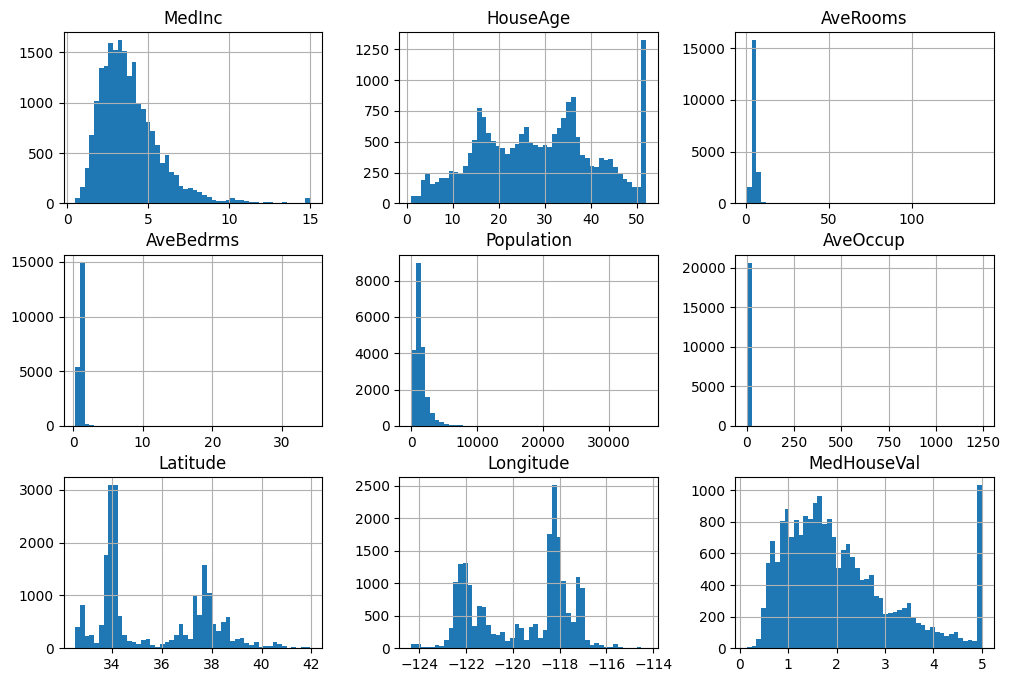

In [4]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

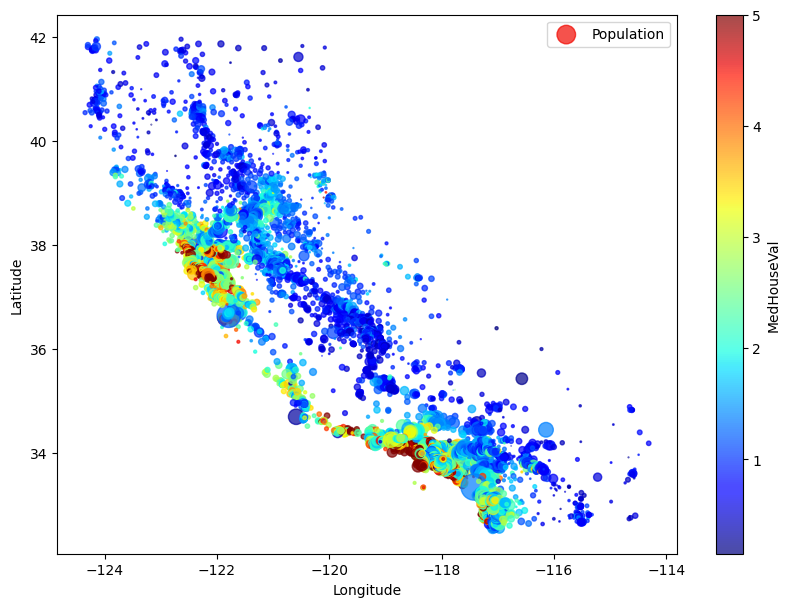

In [5]:
housing.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    c="MedHouseVal",
    cmap="jet",
    colorbar=True,
    s=housing['Population'] / 100,
    alpha=0.7,
    figsize=(10, 7),
    label="Population"
)
plt.legend()
plt.show()

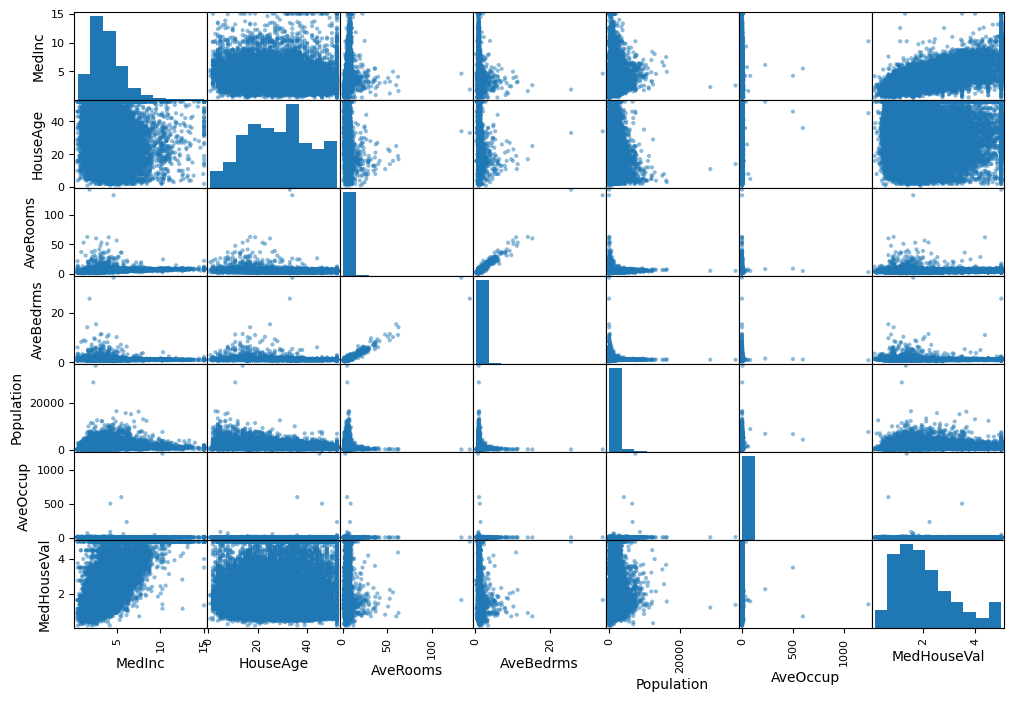

In [6]:
attributes = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

In [7]:
corr_matrix = housing.corr()
print(corr_matrix['MedHouseVal'].sort_values(ascending=False))

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


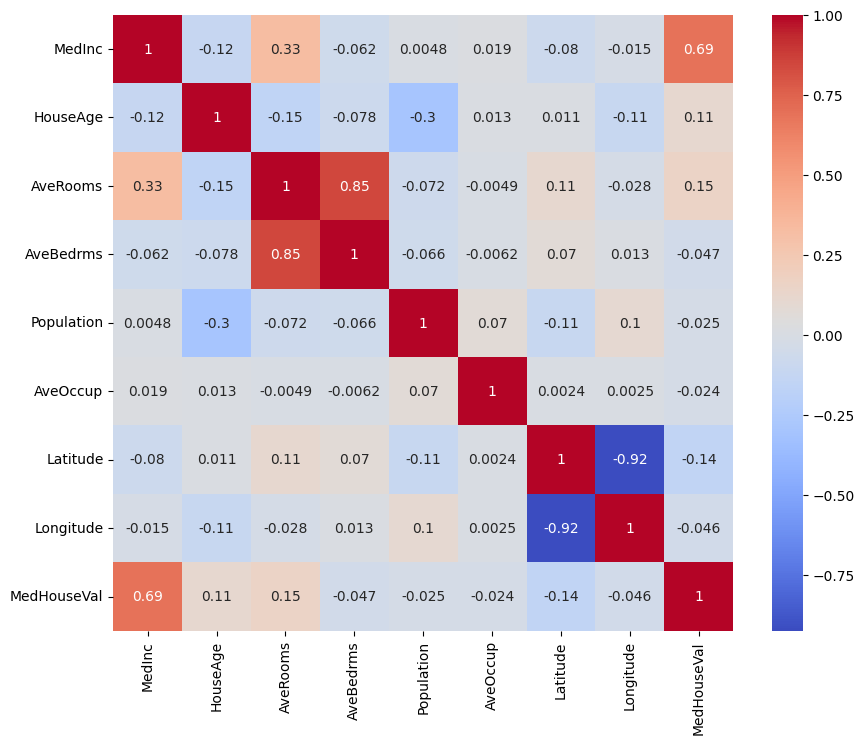

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [10]:
housing['RoomsPerBedroom'] = housing['AveRooms'] / housing['AveBedrms']
housing['PopulationPerRoom'] = housing['Population'] / housing['AveRooms']


In [11]:
X = housing.drop("MedHouseVal", axis=1)
y = housing["MedHouseVal"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
rf_model = RandomForestRegressor(random_state=42)


In [14]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

In [15]:
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

In [16]:
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [17]:
y_pred = best_model.predict(X_test)
print("R2 Score on Test Set:", r2_score(y_test, y_pred))

R2 Score on Test Set: 0.8048007083155841


In [18]:
cv_scores = cross_val_score(best_model, X, y, scoring='r2', cv=5)
print("Cross-Validation R2 Score:", cv_scores.mean())

Cross-Validation R2 Score: 0.6548785112195177


In [19]:
importances = best_model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

<ipython-input-20-a9cfe6fe983b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")


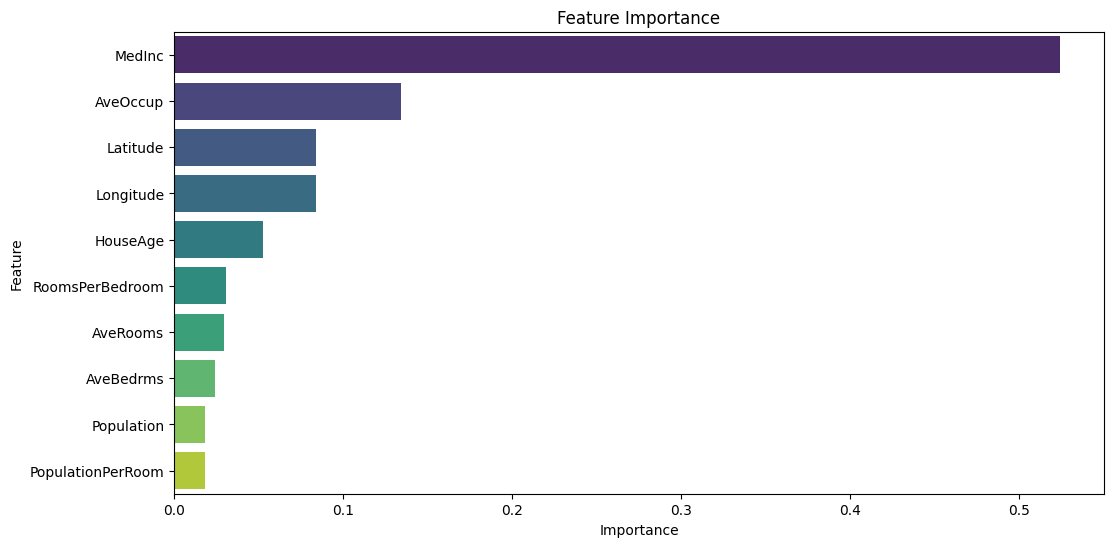

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title('Feature Importance')
plt.show()